In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.9 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import torch

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.



image 1/1 /content/Axial_view_scan_204.jpg: 544x640 2 1s, 17.0ms
Speed: 2.1ms preprocess, 17.0ms inference, 2.2ms postprocess per image at shape (1, 3, 544, 640)
Results saved to /content/runs/detect/predict4
✅ Filtered detections saved at: /content/runs/detect/predict4/filtered_Axial_view_scan_204.jpg


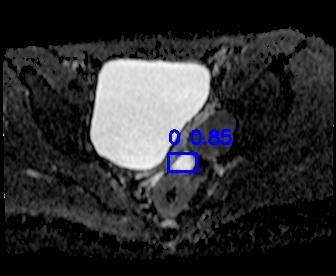

In [ ]:
from ultralytics import YOLO
from IPython.display import Image, display
import cv2
import pathlib

# Paths
test_image_path = "/content/Axial_view_scan_204.jpg"
trained_model = YOLO("/content/drive/MyDrive/train2/weights/best.pt")

# Run prediction
results = trained_model.predict(source=test_image_path, imgsz=640, conf=0.1, save=True)

# Get image height for anatomical filtering
image = cv2.imread(test_image_path)
image_height, image_width = image.shape[:2]

# Parameters for filtering
CONF_THRESHOLD = 0.25  # Ignore low-confidence detections
Y_MIN_RATIO = 0.5      # Only keep boxes below 50% of image height (below bladder area)

# Prepare a copy of the image for visualization
filtered_image = image.copy()

# Loop through detections and apply filters
for box in results[0].boxes:
    x1, y1, x2, y2 = box.xyxy[0].tolist()
    conf = float(box.conf[0])
    cls = int(box.cls[0])

    # Keep only detections that are below the bladder (lower half) and confident enough
    if y1 > image_height * Y_MIN_RATIO and conf > CONF_THRESHOLD:
        # Draw bounding box on the image
        cv2.rectangle(filtered_image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
        cv2.putText(filtered_image, f"{cls} {conf:.2f}", (int(x1), int(y1) - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

# Save filtered result
result_dir = pathlib.Path(results[0].save_dir)
filtered_path = result_dir / ("filtered_" + pathlib.Path(test_image_path).name)
cv2.imwrite(str(filtered_path), filtered_image)

print("✅ Filtered detections saved at:", filtered_path)

# Display filtered result
display(Image(filename=str(filtered_path)))
